In [ ]:
# pip install pandas_ta

In [2]:
import requests
import pandas as pd
# import pandas_ta as ta

COMPANY_NAME = ["NTDOY", "TTWO"]
MY_KEY = "P1Y9WYCX6JNW4N1M"
# endpoints for Nintendo
NTDOY_DAILY_ENDPOINT = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NTDOY&outputsize=full&apikey={MY_KEY}&datatype=csv"
# endpoints for Rockstar
TTWO_DAILY_ENDPOINT = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TTWO&outputsize=full&apikey={MY_KEY}&datatype=csv"

In [ ]:
ntdoy_df = pd.read_csv(NTDOY_DAILY_ENDPOINT)
ntdoy_df = pd.DataFrame(ntdoy_df)
ntdoy_df.head()

,timestamp,open,high,low,close,volume
0,2023-12-06,11.62,11.71,11.57,11.57,1082172
1,2023-12-05,11.50,11.60,11.50,11.55,469018
2,2023-12-04,11.58,11.65,11.49,11.55,562441
3,2023-12-01,11.66,11.78,11.60,11.73,519133
4,2023-11-30,11.60,11.66,11.55,11.63,495569


In [ ]:
ntdoy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5720 entries, 0 to 5719
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5720 non-null   object 
 1   open       5720 non-null   float64
 2   high       5720 non-null   float64
 3   low        5720 non-null   float64
 4   close      5720 non-null   float64
 5   volume     5720 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 268.2+ KB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

ntdoy_df['timestamp'] = pd.to_datetime(ntdoy_df['timestamp'])
# Set the timestamp column as the index for better plotting
fig = px.line(ntdoy_df, x='timestamp', y=['open', 'high', 'low', 'close'],
              labels={'value': 'Price', 'variable': 'Type'},
              title='Nintendo Stock Prices',
              line_shape='linear')

# Customize the layout
fig.update_layout(xaxis_title='Price history (year)', yaxis_title='Price', title_x=0.5)
fig.show()


In [ ]:
ttwo_df = pd.read_csv(TTWO_DAILY_ENDPOINT)
ttwo_df = pd.DataFrame(ttwo_df)
ttwo_df

,timestamp,open,high,low,close,volume
0,2023-12-06,157.50,158.810,156.545,157.32,2544042
1,2023-12-05,154.26,157.980,152.120,156.76,3596960
2,2023-12-04,157.35,158.450,154.500,157.56,1878865
3,2023-12-01,158.69,161.605,157.200,157.84,1733670
4,2023-11-30,157.17,158.540,156.500,158.20,1508258
...,...,...,...,...,...,...
6059,1999-11-05,11.25,12.380,11.190,11.38,1440467
6060,1999-11-04,11.19,11.500,11.060,11.06,672600
6061,1999-11-03,10.75,11.060,10.560,11.06,530000
6062,1999-11-02,10.25,10.690,10.000,10.56,391267


In [ ]:
ttwo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6064 non-null   object 
 1   open       6064 non-null   float64
 2   high       6064 non-null   float64
 3   low        6064 non-null   float64
 4   close      6064 non-null   float64
 5   volume     6064 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 284.4+ KB


In [ ]:
ttwo_df['timestamp'] = pd.to_datetime(ntdoy_df['timestamp'])
# Set the timestamp column as the index for better plotting
fig = px.line(ttwo_df, x='timestamp', y=['open', 'high', 'low', 'close'],
              labels={'value': 'Price', 'variable': 'Type'},
              title='Rockstar Stock Prices',
              line_shape='linear')

# Customize the layout
fig.update_layout(xaxis_title='Price history (year)', yaxis_title='Price', title_x=0.5)
fig.show()



In [ ]:
ntdoy_df = ntdoy_df[ntdoy_df["timestamp"].dt.year>=2019]
ntdoy_df

,timestamp,open,high,low,close,volume
0,2023-12-06,11.62,11.71,11.57,11.57,1082172
1,2023-12-05,11.50,11.60,11.50,11.55,469018
2,2023-12-04,11.58,11.65,11.49,11.55,562441
3,2023-12-01,11.66,11.78,11.60,11.73,519133
4,2023-11-30,11.60,11.66,11.55,11.63,495569
...,...,...,...,...,...,...
1237,2019-01-08,34.94,34.94,34.49,34.74,241370
1238,2019-01-07,33.92,34.67,33.92,34.41,244898
1239,2019-01-04,32.61,33.78,32.51,33.65,400348
1240,2019-01-03,33.34,33.64,33.04,33.25,210811


In [ ]:
ntdoy_df_2022 = ntdoy_df[ntdoy_df["timestamp"].dt.year==2022]

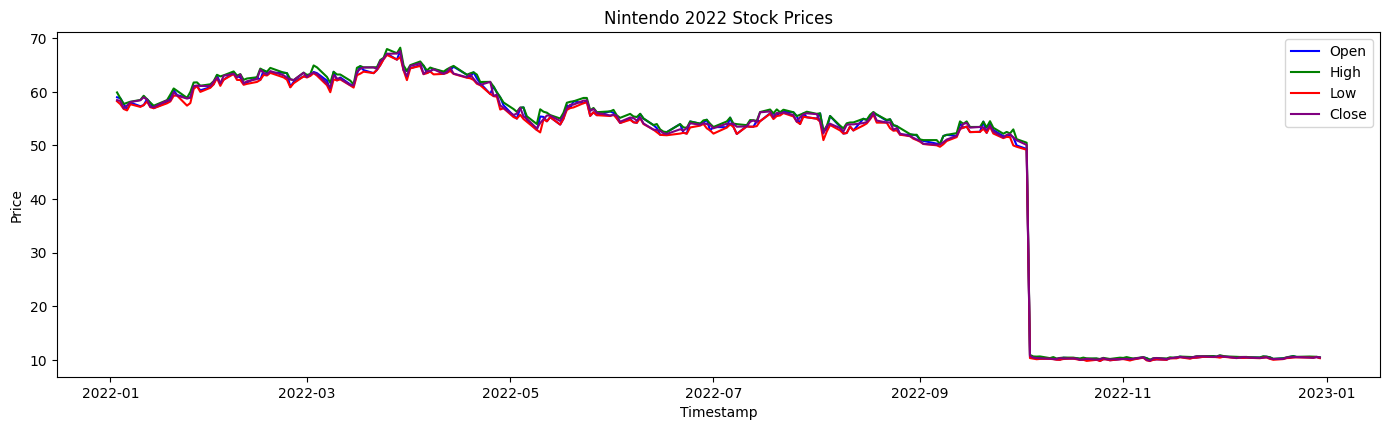

In [ ]:
# Plotting all features
plt.figure(figsize=(14, 8))
ntdoy_df_2022.set_index('timestamp', inplace=True)

# Plotting the open, high, low, and close prices
plt.subplot(2, 1, 1)
plt.plot(ntdoy_df_2022['open'], label='Open', color='blue')
plt.plot(ntdoy_df_2022['high'], label='High', color='green')
plt.plot(ntdoy_df_2022['low'], label='Low', color='red')
plt.plot(ntdoy_df_2022['close'], label='Close', color='purple')
plt.title('Nintendo 2022 Stock Prices')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
ntdoy_df_2022[ntdoy_df_2022['close']>=20]

,open,high,low,close,volume
timestamp,,,,,
2022-10-03,49.35,50.520,49.20,50.1001,583096
2022-09-30,50.00,51.180,49.76,50.9700,447711
2022-09-29,51.50,53.000,50.00,51.4900,445900
2022-09-28,52.00,52.245,51.55,52.1400,241362
2022-09-27,51.60,52.530,51.60,51.9700,486059
...,...,...,...,...,...
2022-01-07,58.00,58.170,57.70,58.1000,290999
2022-01-06,56.68,57.960,56.55,57.4500,339191
2022-01-05,57.74,57.750,56.81,56.9400,225540


In [ ]:
ntdoy_df_2022[ntdoy_df_2022['close']<=20]

,open,high,low,close,volume
timestamp,,,,,
2022-12-30,10.40,10.450,10.30,10.42,862856
2022-12-29,10.50,10.560,10.50,10.53,684278
2022-12-28,10.48,10.580,10.37,10.37,935630
2022-12-27,10.52,10.600,10.40,10.41,850935
2022-12-23,10.50,10.550,10.45,10.52,801467
...,...,...,...,...,...
2022-10-10,10.27,10.305,10.17,10.20,548462
2022-10-07,10.37,10.620,10.16,10.27,783023
2022-10-06,10.50,10.590,10.10,10.34,564016


In [ ]:
ntdoy_oct_2022 = ntdoy_df[(ntdoy_df['timestamp'].dt.year==2022) & (ntdoy_df['timestamp'].dt.month==10)]


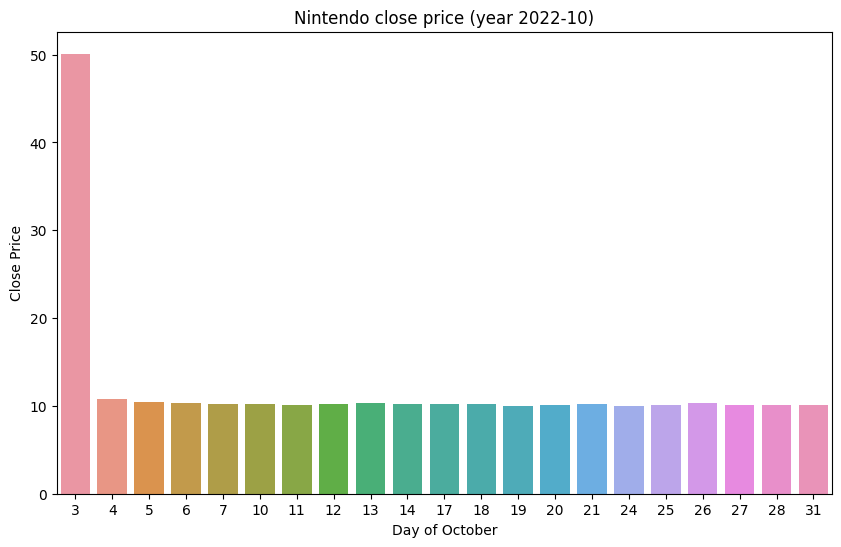

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=ntdoy_oct_2022['timestamp'].dt.day, y='close', data=ntdoy_oct_2022)
plt.title('Nintendo close price (year 2022-10)')
plt.xlabel('Day of October')
plt.ylabel('Close Price')
plt.show()

In [ ]:
# Identify the date of the share split
share_split_date = pd.to_datetime('10/04/2022')

# Filter data before and after the share split date
before_split = ntdoy_df[ntdoy_df['timestamp'] < share_split_date]
after_split = ntdoy_df[ntdoy_df['timestamp'] >= share_split_date]

# Divide the prices before the share split date by 5
before_split[['open', 'high', 'low', 'close']] = before_split[['open', 'high', 'low', 'close']] / 5

# Concatenate the adjusted data
adjusted_ntdoy_df = pd.concat([after_split, before_split])

adjusted_ntdoy_df

<ipython-input-18-ad8491191901>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timestamp,open,high,low,close,volume
0,2023-12-06,11.620,11.710,11.570,11.570,1082172
1,2023-12-05,11.500,11.600,11.500,11.550,469018
2,2023-12-04,11.580,11.650,11.490,11.550,562441
3,2023-12-01,11.660,11.780,11.600,11.730,519133
4,2023-11-30,11.600,11.660,11.550,11.630,495569
...,...,...,...,...,...,...
1237,2019-01-08,6.988,6.988,6.898,6.948,241370
1238,2019-01-07,6.784,6.934,6.784,6.882,244898
1239,2019-01-04,6.522,6.756,6.502,6.730,400348
1240,2019-01-03,6.668,6.728,6.608,6.650,210811


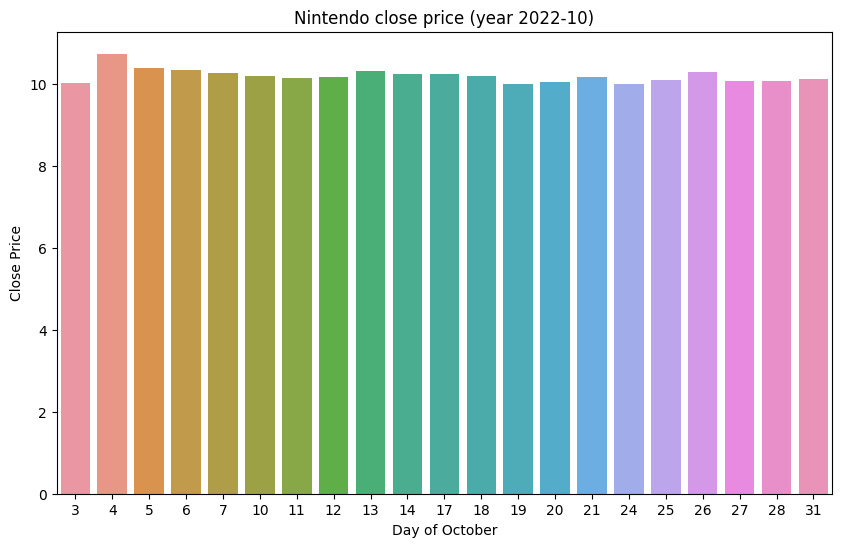

In [ ]:
ntdoy_oct_2022 = adjusted_ntdoy_df[(ntdoy_df['timestamp'].dt.year==2022) & (adjusted_ntdoy_df['timestamp'].dt.month==10)]
plt.figure(figsize=(10, 6))
sns.barplot(x=ntdoy_oct_2022['timestamp'].dt.day, y='close', data=ntdoy_oct_2022)
plt.title('Nintendo close price (year 2022-10)')
plt.xlabel('Day of October')
plt.ylabel('Close Price')
plt.show()

In [ ]:
selected_ttwo_df = ttwo_df[ttwo_df["timestamp"].dt.year>=2019]
selected_ttwo_df

,timestamp,open,high,low,close,volume
0,2023-12-06,157.50,158.810,156.545,157.32,2544042
1,2023-12-05,154.26,157.980,152.120,156.76,3596960
2,2023-12-04,157.35,158.450,154.500,157.56,1878865
3,2023-12-01,158.69,161.605,157.200,157.84,1733670
4,2023-11-30,157.17,158.540,156.500,158.20,1508258
...,...,...,...,...,...,...
1237,2019-01-08,106.21,109.450,105.250,107.92,2402187
1238,2019-01-07,101.50,104.940,99.290,104.41,2501858
1239,2019-01-04,101.13,103.760,99.660,101.70,3610836
1240,2019-01-03,102.40,103.000,99.110,99.15,2301077
